<a href="https://colab.research.google.com/github/jyotidabass/Tongue-image-processing/blob/main/Tongue_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

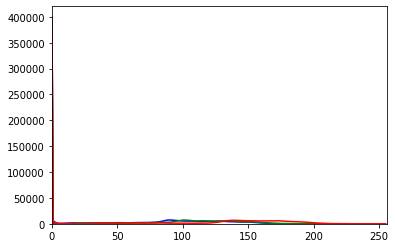

905 1037


(<matplotlib.axes._subplots.AxesSubplot at 0x7faa5418a150>,
 Text(0.5, 1.0, 'BLUR'))

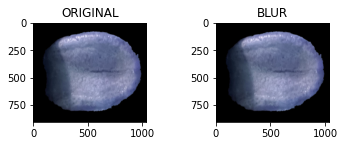

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

im = cv2.imread('/content/cropped-1E6AE7E2-F4F6-4EFC-AFEC-75B6AF988C47 - Abhishek Karekar.jpg')

(b,g,r) =cv2.split(im)
r1 = im[:,:,2]
g1 = im[:,:,1]
b1 = im[:,:,0]

gray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
ori = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)

from google.colab.patches import cv2_imshow

cv2.waitKey(0)

color = ('b','g','r')

for i,col in enumerate(color) :
    hist = cv2.calcHist([im],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])

plt.hist(hist)
plt.show()

(h,w) = im.shape[:2]
print(h,w)
center = (h/2,w/2)

M = cv2.getRotationMatrix2D(center,90,1.0)
rotated = cv2.warpAffine(im,M,(h,w))

cv2.waitKey(0)

cropped = im[100:200,100:200]

cv2.waitKey(0)

edge = np.array(([-1,-1,-1],[-1,8,-1],[-1,-1,-1]),dtype="int")
blur = np.array(([1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]))
emboss = np.array(([-2,1,0],[-1,1,1],[0,1,2]),dtype="int")

convolution = cv2.filter2D(im,-1,edge)
convolution1 = cv2.filter2D(im,-1,blur)
convolution2 = cv2.filter2D(im,-1,emboss)

plot_image = np.concatenate((im,convolution1),axis=1)
plt.subplot(221),plt.imshow(im),plt.title('ORIGINAL')
plt.subplot(222),plt.imshow(convolution1),plt.title('BLUR')


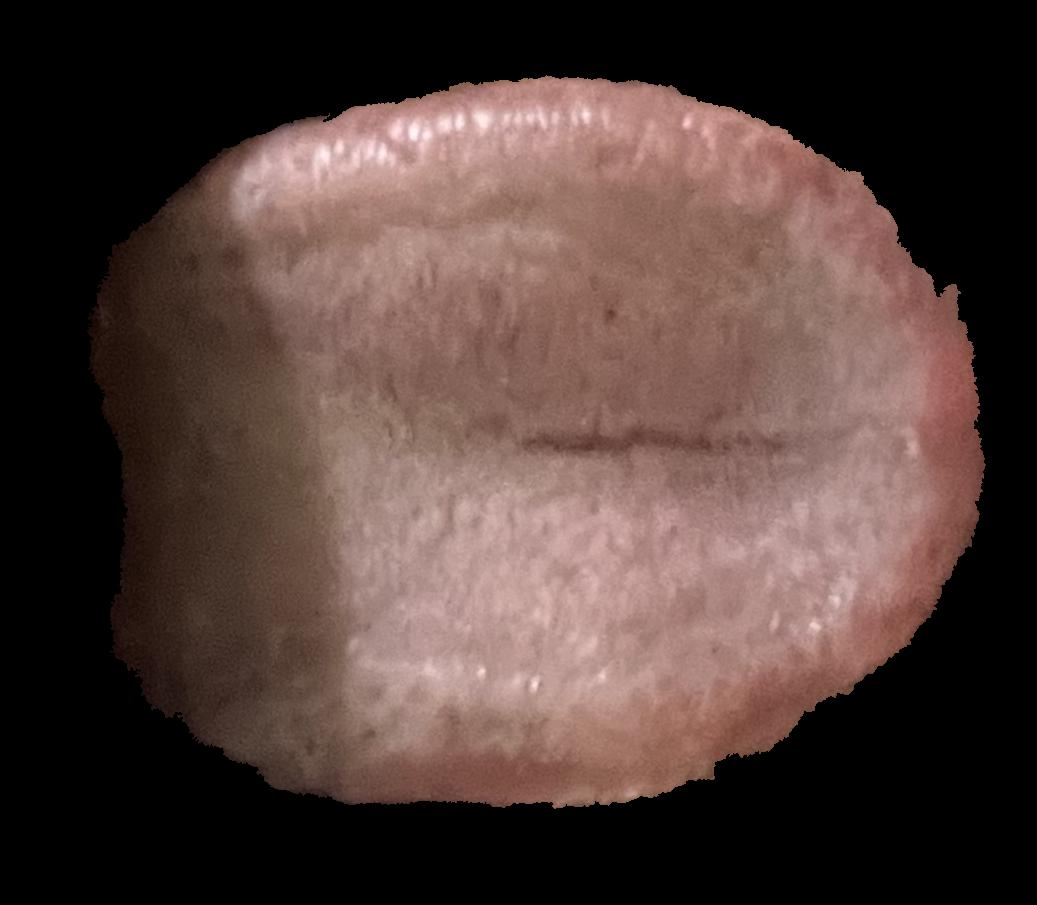

In [ ]:
cv2_imshow(im)

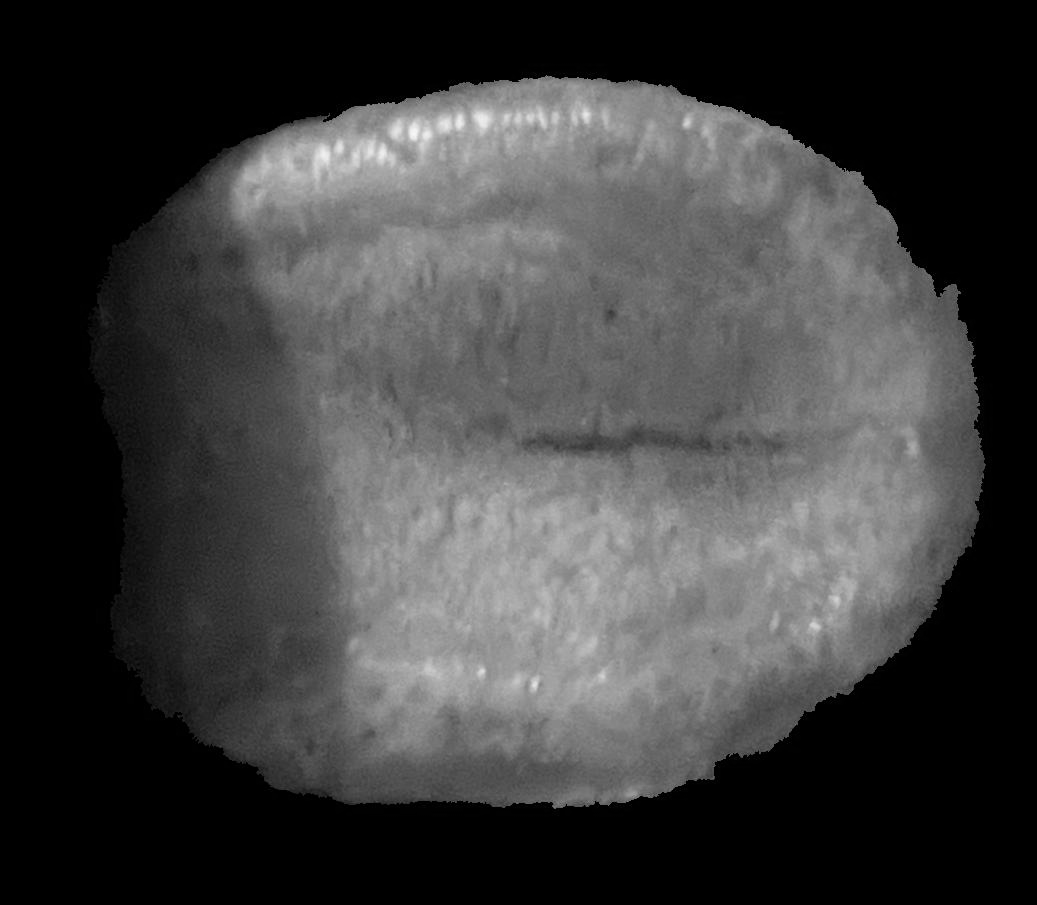

In [ ]:
cv2_imshow(gray)

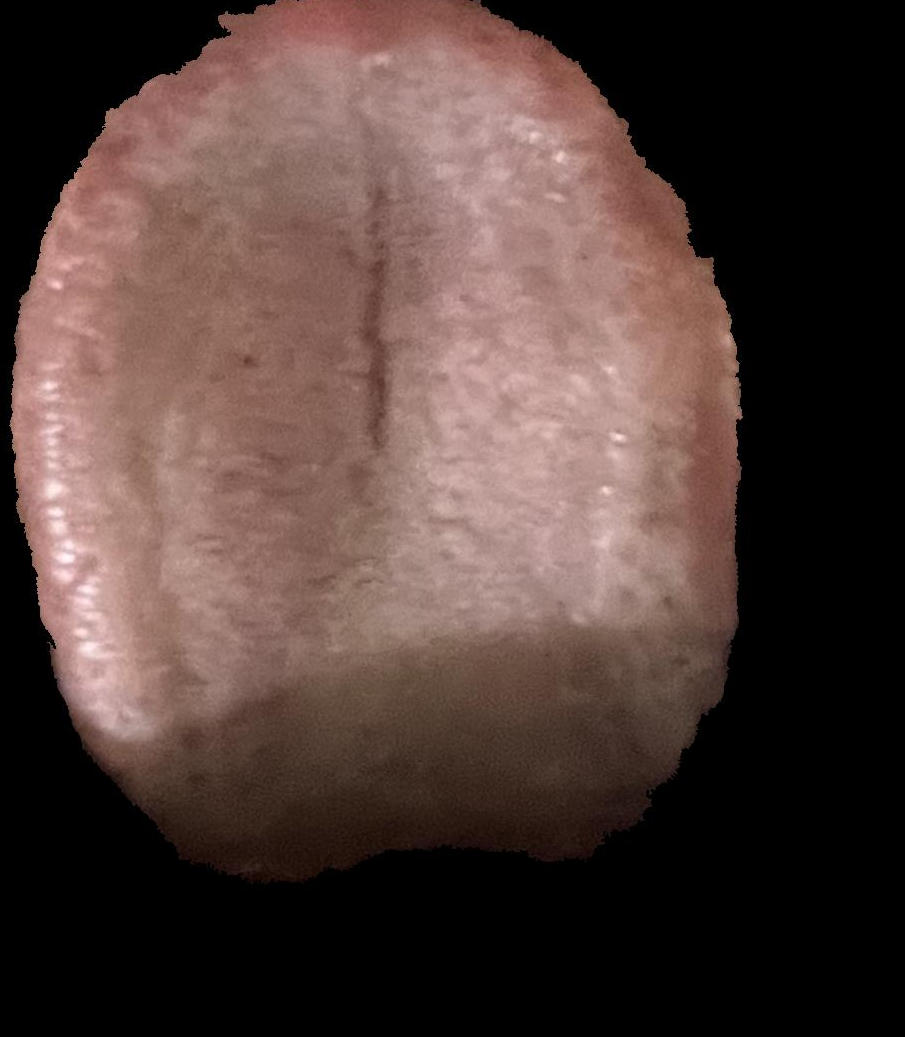

In [ ]:
cv2_imshow(rotated)

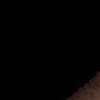

In [ ]:
cv2_imshow(cropped)

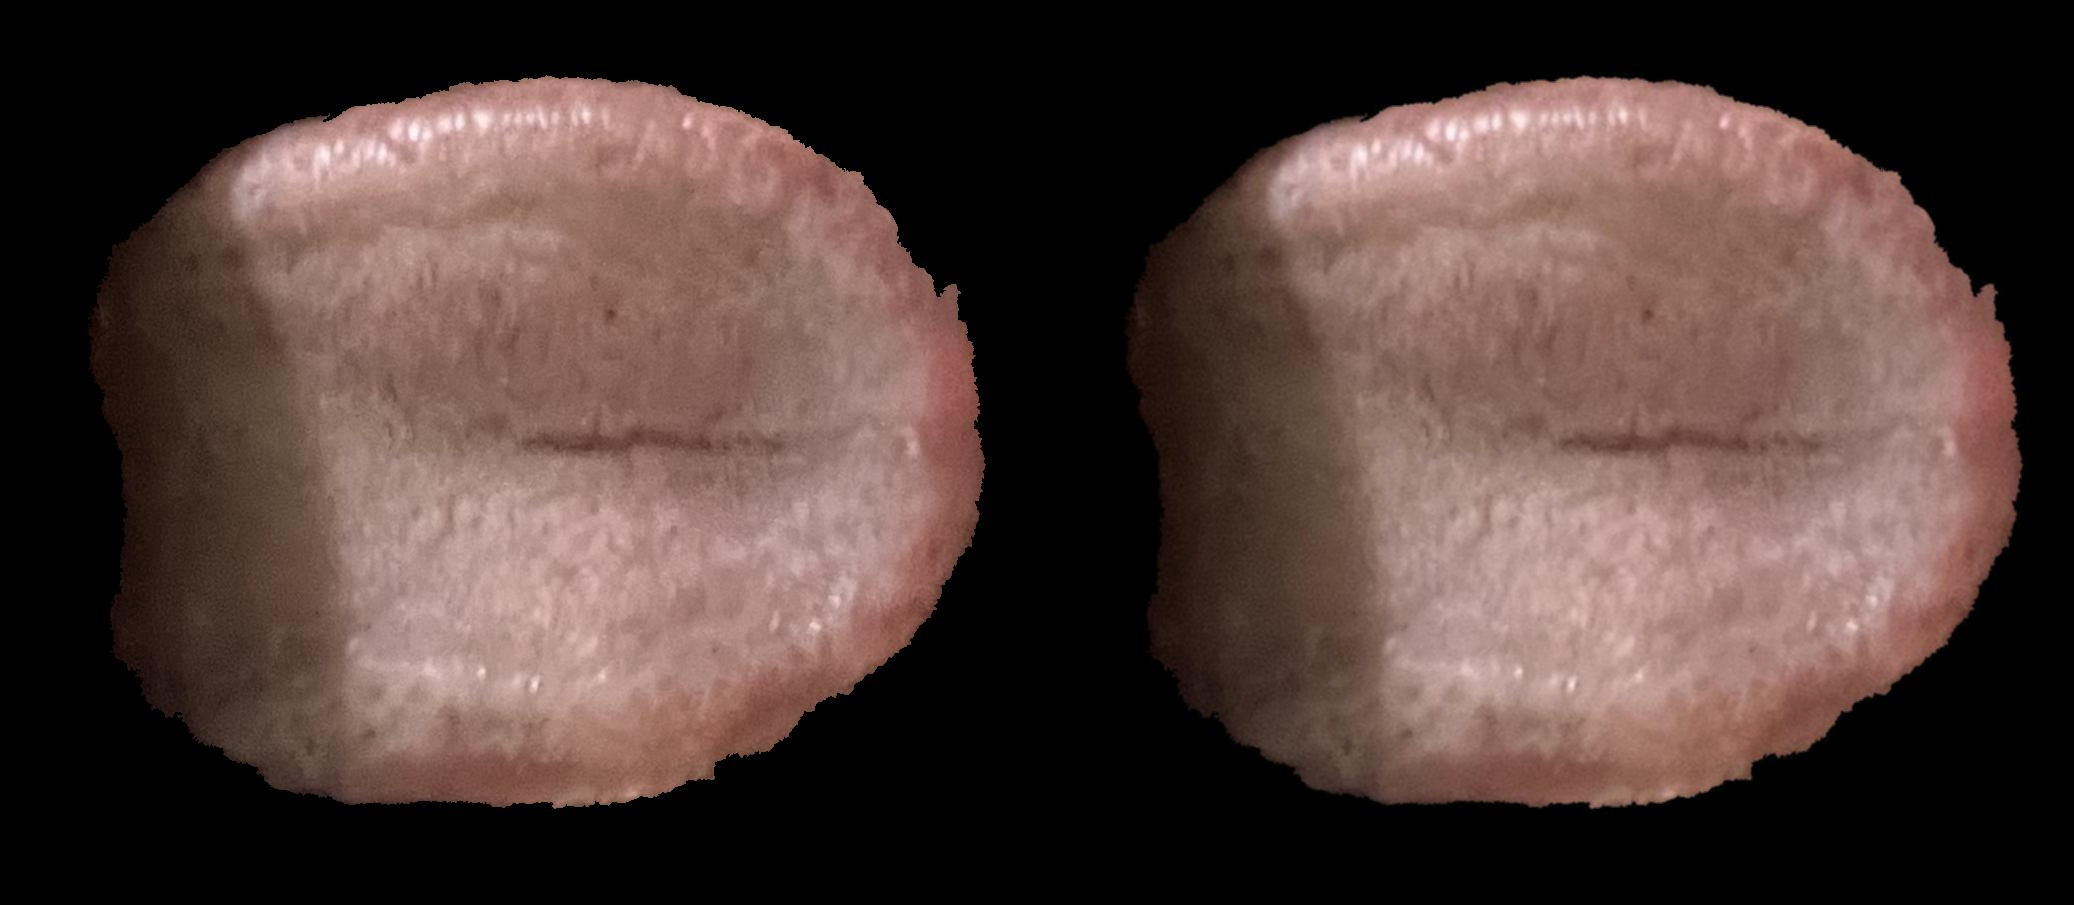

In [ ]:
cv2_imshow(plot_image)